# Costa Rica Apartment Rentals Prediction Model

## 1. Importing Libraries

In [49]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

## 2. Understanding the Data

In [7]:
# Method allows the user to analyze and drop Rows/Columns with Null values in different ways
# costa_rica.dropna()

REPLACE_NAME_VALUE = "$"
REPLACE_HOST_NAME_VALUE = "#"

# Fill NA/NaN values using the specified method.
costa_rica['name'].fillna(REPLACE_NAME_VALUE, inplace=True)           
costa_rica['host_name'].fillna(REPLACE_HOST_NAME_VALUE, inplace=True)


In [8]:
print("Length of Costa Rica DataFrame that match with Name = \"{}\": {}".format(REPLACE_NAME_VALUE, len(costa_rica[costa_rica.name == REPLACE_NAME_VALUE])))
print("Length of Costa Rica DataFrame that match with Host_Name = \"{}\": {}".format(REPLACE_HOST_NAME_VALUE, len(costa_rica[costa_rica.host_name == REPLACE_HOST_NAME_VALUE])))

Length of Costa Rica DataFrame that match with Name = "$": 16
Length of Costa Rica DataFrame that match with Host_Name = "#": 21


In [9]:
'''Show the first 5 rows in costarica dataset'''
costa_rica.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Monteverde,San Luis,9.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Kennedy Castle,2845,Jennifer,San Jose,Kennedy,9.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF Rohr Moser....COSTA RICA !,4632,Elisabeth,San Jose,Rohr Moser,9.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Monteverde,Barrio Orquideas,9.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,San Jose,Barrio Escalante,9.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [11]:
len(costa_rica.index) 

48895

In [12]:
costa_rica.shape

(48895, 16)

### 2.1 Data frame summary

In [14]:
costa_rica.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### 2.2 Understanding the Statistical Measures

In [16]:
costa_rica.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.799355e+07,6.387930e+07,9.729401,-73.952935,148.352920,7.002434,23.074936,1.373221,7.143982,111.821066
std,1.138334e+07,7.771565e+07,0.054719,0.046360,237.956023,20.348852,44.161588,1.680442,32.952519,131.295290
min,1.299000e+03,8.490000e+02,9.499790,-74.298400,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.637016e+06,6.633604e+06,9.690270,-73.984210,65.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.857008e+07,2.574195e+07,9.723070,-73.956740,100.000000,3.000000,5.000000,0.720000,1.000000,43.000000
75%,2.845752e+07,1.011704e+08,9.763695,-73.936345,175.000000,5.000000,23.000000,2.020000,2.000000,223.000000
max,3.648724e+07,2.743213e+08,9.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## 3. Data Analysis

### 3.1 Number of Room Types Available

In [20]:
costa_rica.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

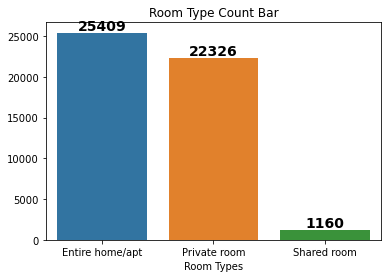

In [21]:
room_type_plot = sns.countplot(x="room_type", order = costa_rica.room_type.value_counts().index, data=costa_rica)
room_type_plot.set(xlabel='Room Types', ylabel='', title='Room Type Count Bar')
for bar in room_type_plot.patches:
    h = bar.get_height()
    room_type_plot.text(
        bar.get_x() + bar.get_width()/2.,  # bar index (x coordinate of text)
        h,                                 # y coordinate of text
        '%d' % int(h),                     # y label
        ha='center', 
        va='bottom',
        color='black',
        fontweight='bold',
        size=14)
    
plt.show()

### 3.2 Percentage representation of neighbourhood group in pie

In [23]:
costa_rica.neighbourhood_group.value_counts(dropna = False, normalize = True)

San Jose      0.443011
Monteverde    0.411167
Jaco          0.115881
Liberia       0.022313
Quepos        0.007629
Name: neighbourhood_group, dtype: float64

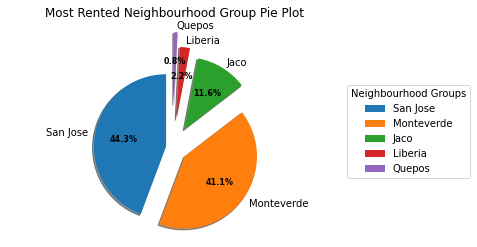

In [24]:
labels = costa_rica.neighbourhood_group.value_counts().index
sizes = costa_rica.neighbourhood_group.value_counts().values
explode = (0.1, 0.2, 0.3, 0.4, 0.6)

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                                   shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set(title="Most Rented Neighbourhood Group Pie Plot")
ax.legend(wedges, labels,
          title="Neighbourhood Groups",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
plt.show()

### 3.3 Neighbourhoods with rentals grouped by Neighbourhood Group in BarChart

In [25]:
for neighbourhood_group in costa_rica.neighbourhood_group.unique():
    neighbourhoods = costa_rica.neighbourhood[costa_rica.neighbourhood_group == neighbourhood_group].unique()
    print("{} has {} Neighbourhoods: {}...\n".format(
        neighbourhood_group, 
        len(neighbourhoods), 
        neighbourhoods[:5]
    ))

Monteverde has 4 Neighbourhoods: ['San Luis' 'Barrio Orquideas' 'El Socorro' 'Valle Bonito']...

San Jose has 8 Neighbourhoods: ['Kennedy' 'Rohr Moser' 'Barrio Escalante' 'Hatillo 6' 'Barrio Lujan']...

Jaco has 12 Neighbourhoods: ['Barrio El INVU' 'Barrio Camboya' 'Pochotal' 'Barrio Santa Luc�a'
 'Barrio Copey']...

Quepos has 10 Neighbourhoods: ['Domas District' 'El Cerro' 'Paquita' 'Sen Rafael' 'San Martin']...

Liberia has 9 Neighbourhoods: ['El Jicaro' 'Moracia' 'Curime' 'Barrrio La Guaria' 'Condega']...



C:\Users\Owner\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Owner\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


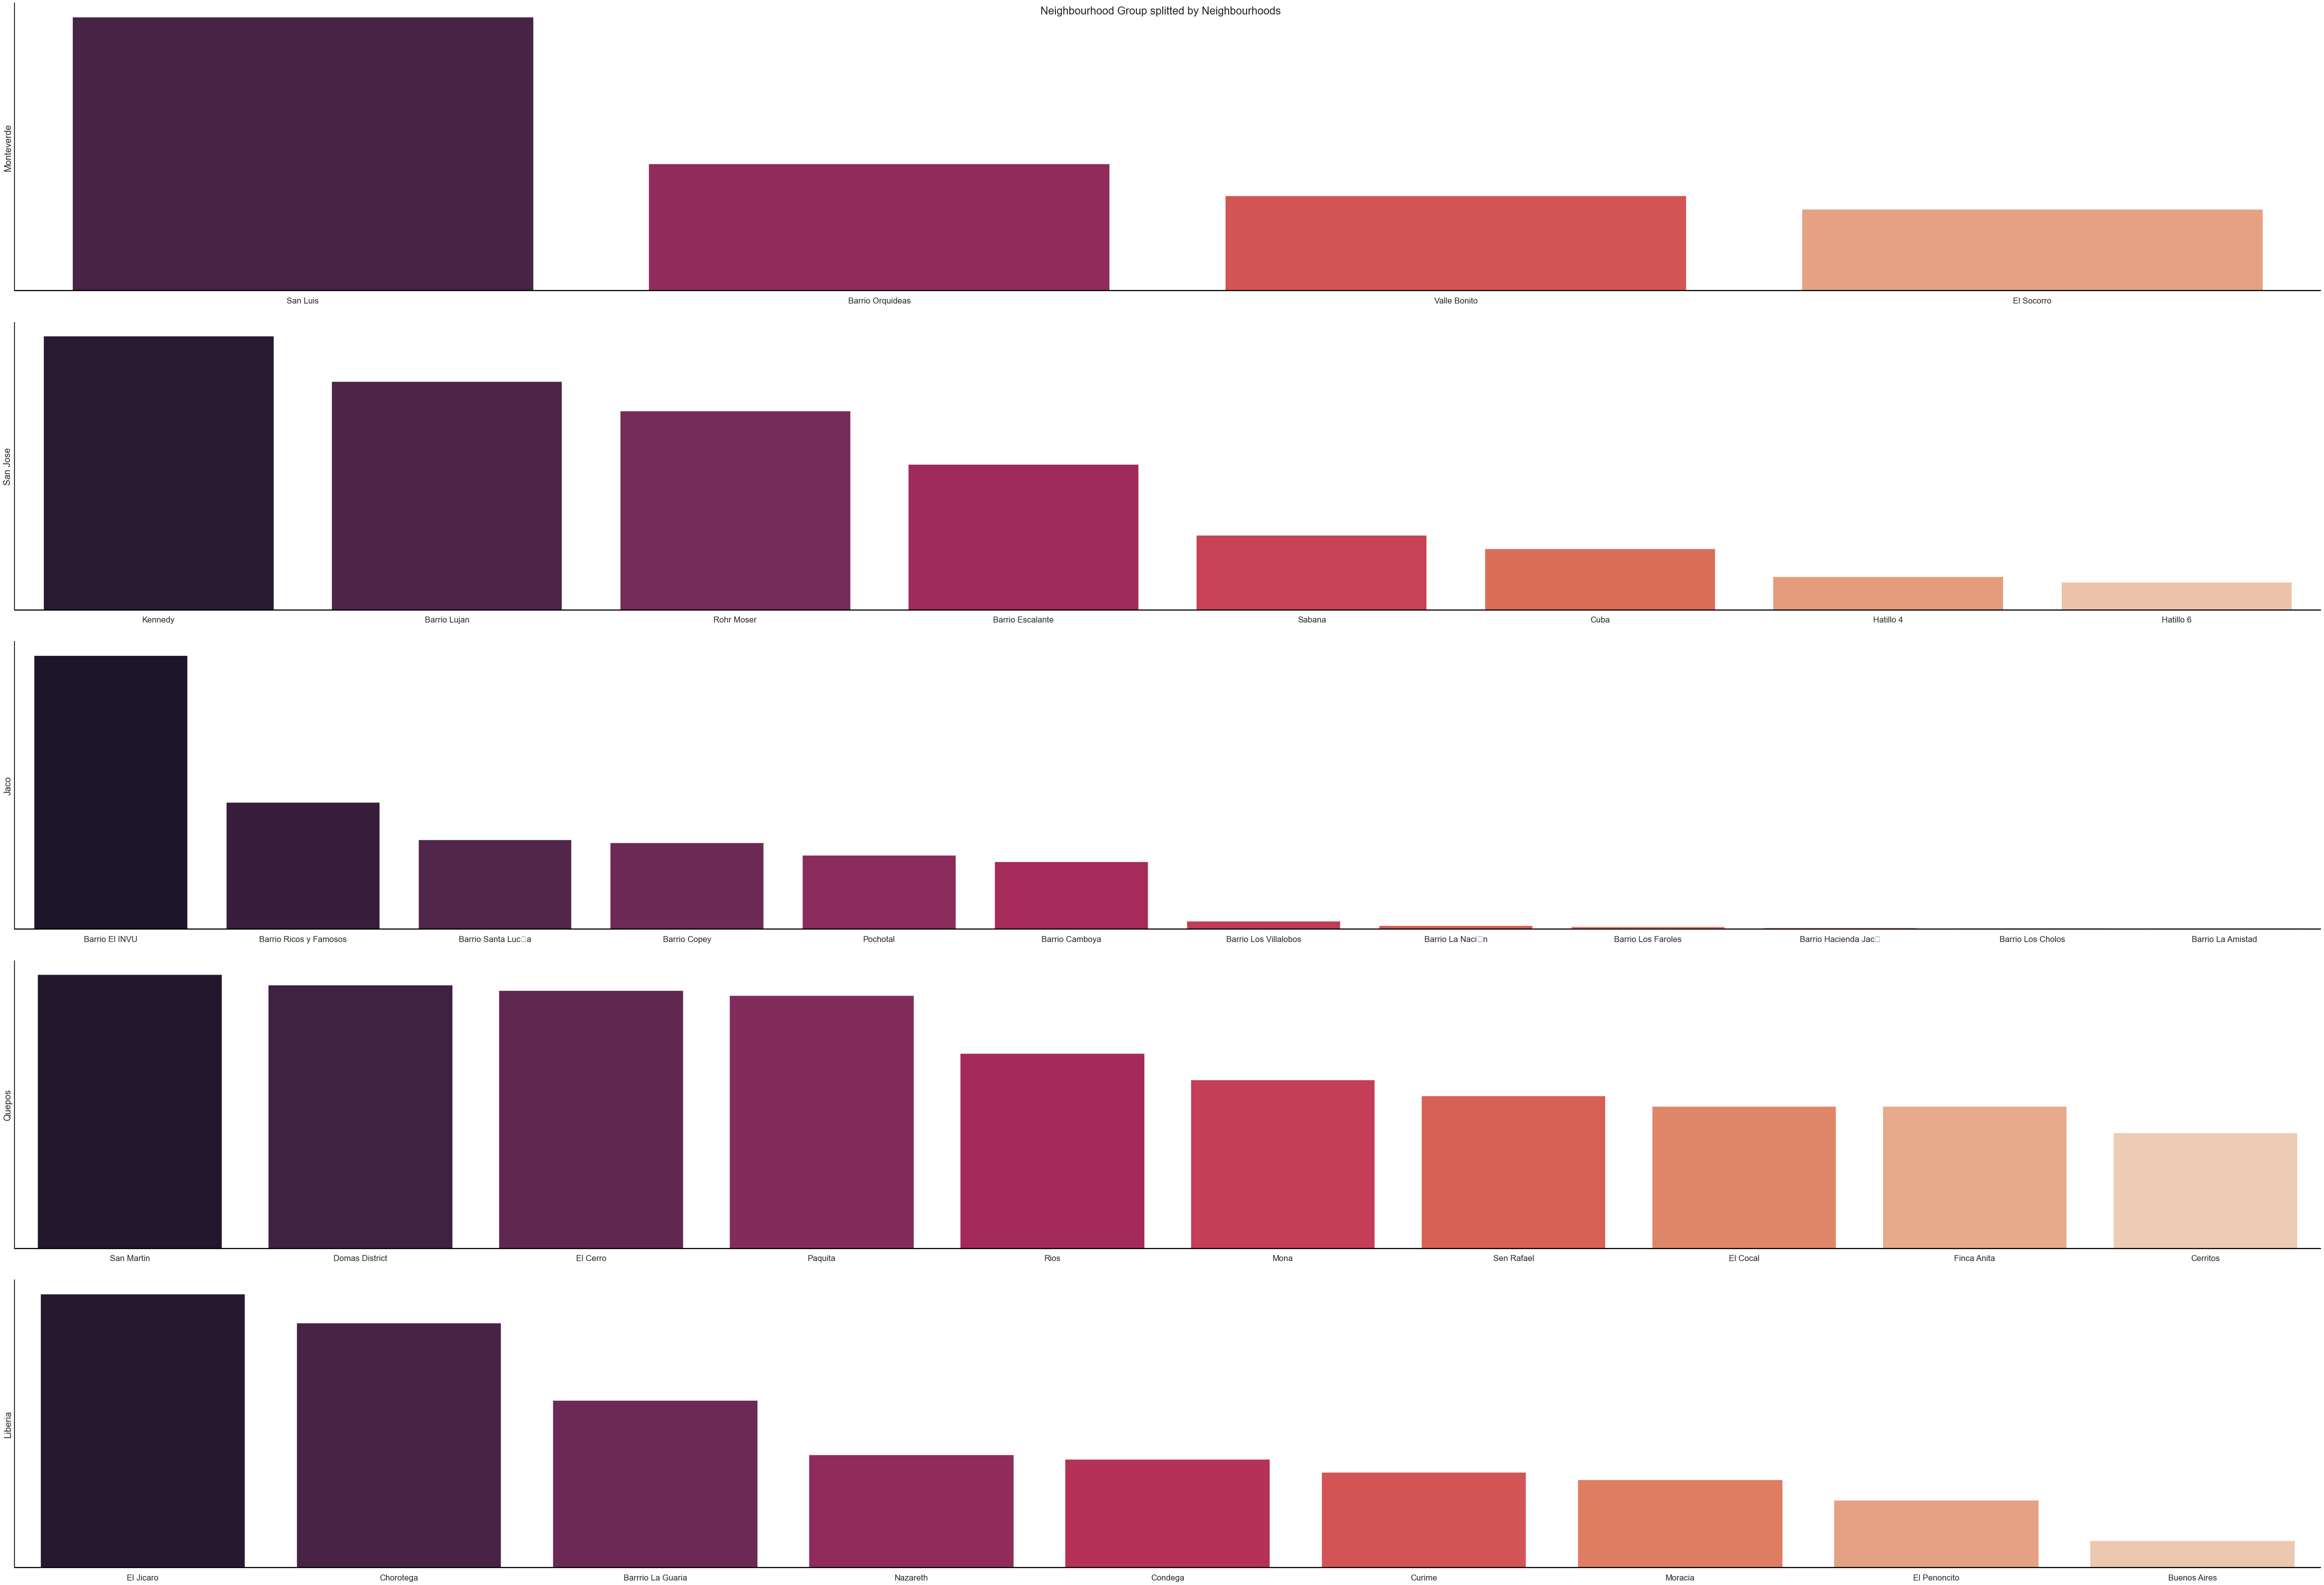

In [28]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, subplots = plt.subplots(len(costa_rica.neighbourhood_group.unique()), 1, figsize=(65, 45))

for i, neighbourhood_group in enumerate(costa_rica.neighbourhood_group.unique()):
    neighbourhoods = costa_rica.neighbourhood[costa_rica.neighbourhood_group == neighbourhood_group]
    ax = subplots[i]
    x = np.array(neighbourhoods.value_counts().index)
    y = neighbourhoods.value_counts().values
    sns.barplot(x=x, y=y, palette="rocket", ax=ax)
    ax.axhline(0, color="black", clip_on=False)
    ax.set_ylabel(neighbourhood_group)

# Finalize the plot
sns.despine(bottom=True)
f.suptitle('Neighbourhood Group splitted by Neighbourhoods ')
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
plt.show()

###### Given this graphic outputs we finally can see, that the most rented neighbourhood group is San Jose following by Monteverde and Jaco. As we can see given the last results that as much surface has the neighbourhood group doesn't mean will have the most rented zone, moreover it's the smallest one !


### 3.4 Density and Distribution of Prices for each Neighbourhood Group

<ipython-input-30-fa4efd71aca1>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  density_neigh_price_plot.set_yticklabels(ylabels)


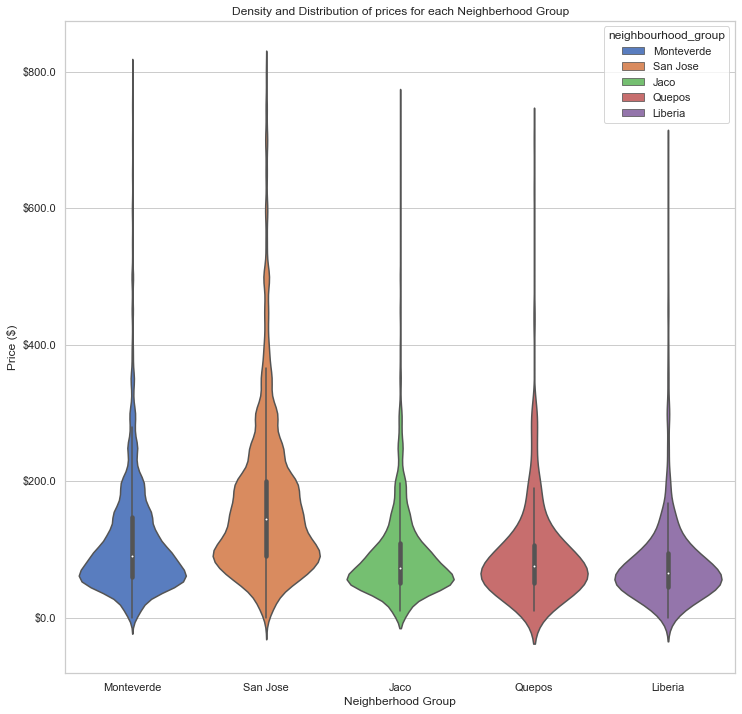

In [30]:
sns.set(style="whitegrid")
# Parameters
FILTER_PRICE_VALUE = 800

# Filter costa_rica prices for shake of the visualization
sub_costa_rica_price = costa_rica[costa_rica.price < FILTER_PRICE_VALUE]

# Create ViolinPlot
fig, ax = plt.subplots(figsize=(12, 12))
density_neigh_price_plot = sns.violinplot(ax=ax, x="neighbourhood_group", y="price", 
                                          hue="neighbourhood_group", data=sub_costa_rica_price, 
                                          palette="muted", dodge=False)
density_neigh_price_plot.set(xlabel='Neighberhood Group', ylabel='Price ($)', 
                             title='Density and Distribution of prices for each Neighberhood Group')
ylabels = ['${}'.format(x) for x in density_neigh_price_plot.get_yticks()]
density_neigh_price_plot.set_yticklabels(ylabels)
plt.show()

###### According to the "Density and Distribution of prices for each Neighborhood Group" plot we can set up that the average of all the apartment & room prices are between 50$ - 200$, but is more remarkable for the average zones like: Jaco, Quepos and Liberia.

For the other hand, we can notice a slightly overpriced in San Jose and Monteverde neighborhood group, with the majority of density in prices between 200$ - 400$ it's definitely a difference if you are going to get a rent in the next days and you want to save your wallet!

We finally decide there is a notice over cost if you'd like to rent a room/apartment in the San Jose neighbourhood group between 100$ - 600$.

### 3.5 Minimum nights by room type

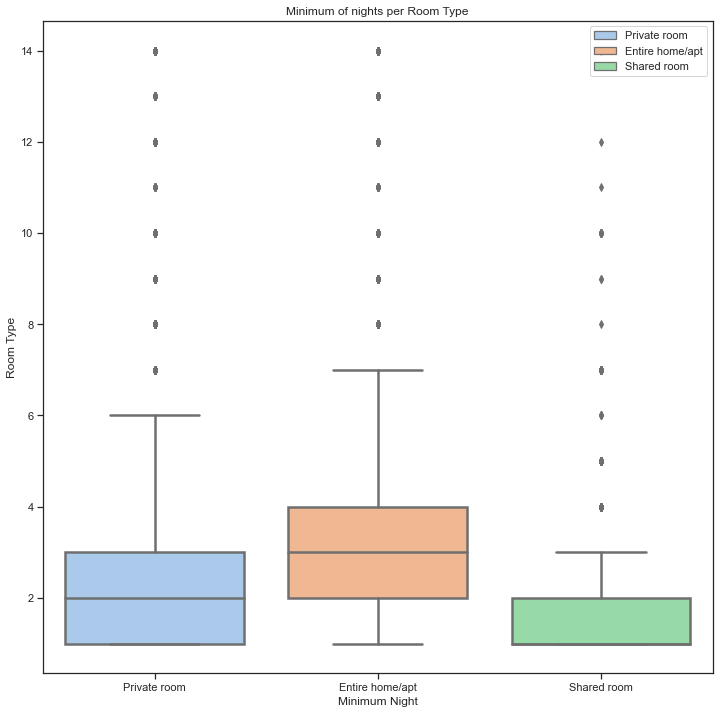

In [33]:
# Parameters
MINIMUM_NIGHTS_FILTER = 15      # Filter minimum nights to 2 weeks (15 days/nights)

# Data Preparation
sub_costa_rica = costa_rica[costa_rica.minimum_nights < MINIMUM_NIGHTS_FILTER]

# BoxPlot Creation 
fig, ax = plt.subplots(figsize=(12, 12))
sns.set(style="ticks", palette="pastel")
nights_per_room = sns.boxplot(x="room_type", y="minimum_nights", ax=ax,
                              hue="room_type", dodge=False, linewidth=2.5,
                              data=sub_costa_rica,)

nights_per_room.set(xlabel='Minimum Night', ylabel='Room Type', 
                             title='Minimum of nights per Room Type')
plt.legend(loc='upper right')
plt.show()

###### We could come up with the idea that if we'd like to rent a long-term Costa-Rica rentals we should go into an entire home or apartment, if's not we always can get a shared room.

### 3.6 Distribution Price by Neighbourhood Groups

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

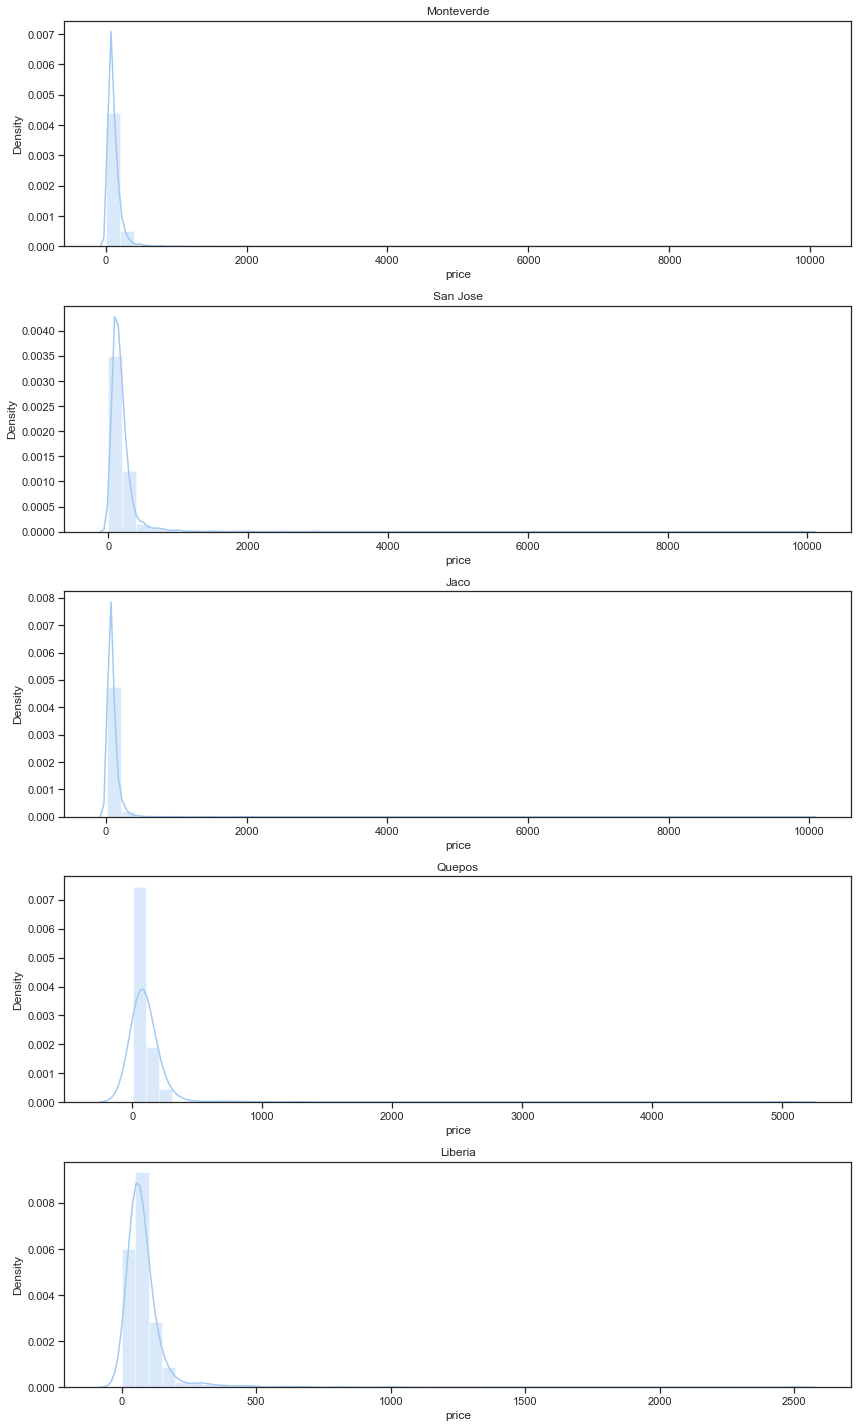

In [35]:
# Set up the matplotlib figure
f, subplots = plt.subplots(
                len(costa_rica.neighbourhood_group.unique()), 
                figsize=(12, 20)
            )

for i, neighbourhood_group in enumerate(costa_rica.neighbourhood_group.unique()):
    neighbourhoods = costa_rica[costa_rica.neighbourhood_group == neighbourhood_group]['price']
    ax = subplots[i]
    dist_plot = sns.distplot(neighbourhoods, ax=ax)
    dist_plot.set_title(neighbourhood_group)

# Finalize the plot
plt.tight_layout(h_pad=1)
plt.show()

###### As we can see, in our grid of distribution plots we already have the data distributed by price and splitted by Neighbourhood group, so according to the plot above we finally can determinate that:

Monteverde averages around 70-500$ per night depending upon the neighbourhood.
San Jose averages around 80-490$ ...
Jaco averages around 60-280$...
Quepos averages around 50-800$...
Liberia averages around 50-450$ ...

### 3.7 Number of reviews grouped by Host Id

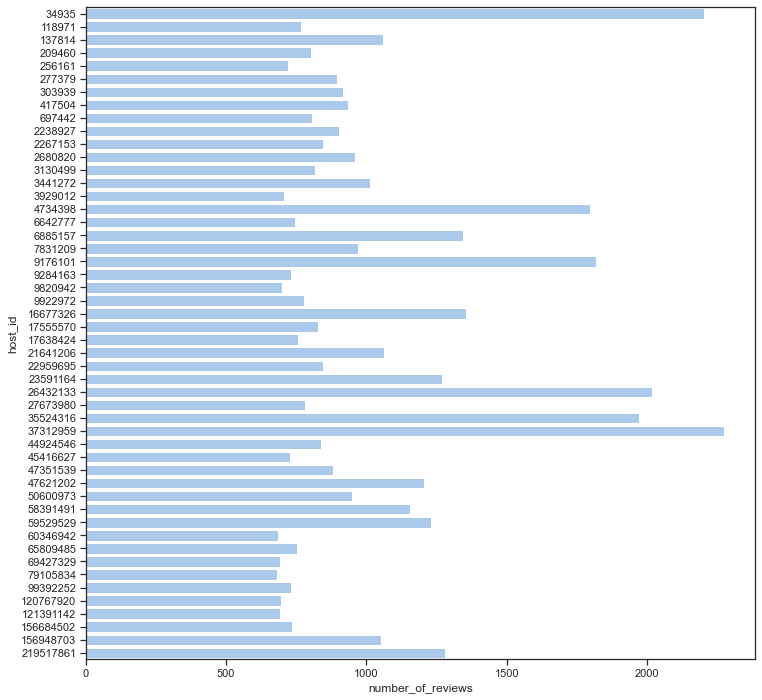

In [36]:
# Data Preparation
serie_costa_rica = costa_rica.groupby("host_id")["number_of_reviews"].agg("sum")
frame = { 'host_id': serie_costa_rica.index, 'number_of_reviews': serie_costa_rica.values }
df_costa_rica = pd.DataFrame(frame).sort_values('number_of_reviews', ascending=False).head(50)

# BarPlot creation 
f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x="number_of_reviews", y="host_id", 
            data=df_costa_rica, color="b", ax=ax, orient="h")

# Add a legend and informative axis label
plt.show()

#### 3.7.1 Printing the names of "top 10 host id"

In [37]:
top_10_host_id = df_costa_rica.host_id.unique()[:10]
names = costa_rica.host_name[costa_rica.host_id.isin(top_10_host_id)].unique()
names

array(['Jj', 'Randy', 'Alex And Zeena', 'Angela', 'Danielle',
       'Yasu & Akiko', 'Maya', 'Monteverde&   Breakfast    -Len-',
       'Brady', 'Sonder (NYC)'], dtype=object)

### 3.8 Visualization using correlation

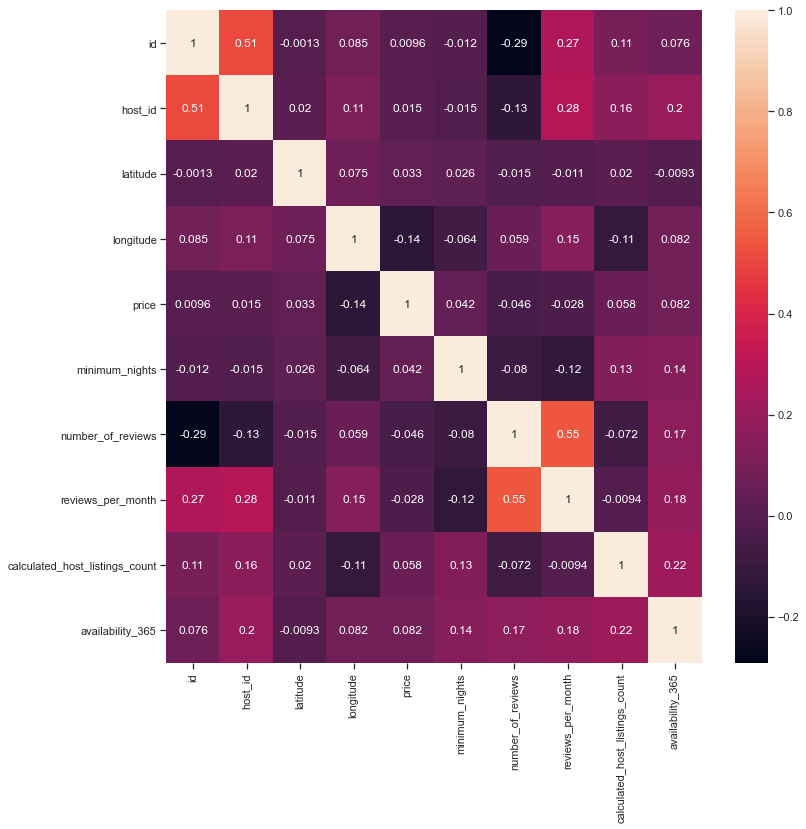

In [45]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(costa_rica.corr(),annot=True)

###### No strong correlation except number_of_reviews vs reviews_per_month

## 4. Data Visualizations

### 4.1 Price Overview in a Heatmap

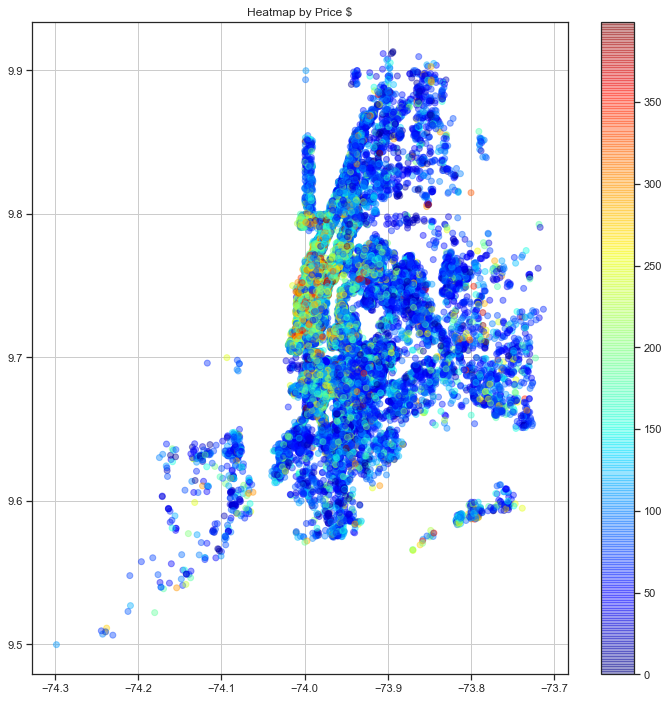

In [46]:
# Filter values
FILTER_PRICE_VALUE = 400 
sub_costa_rica = costa_rica[costa_rica.price < FILTER_PRICE_VALUE]

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 12))

cmap = plt.get_cmap('jet') # ColorMaps
c = sub_costa_rica.price           # color, sequence, or sequence of color, optional
alpha = 0.5                # The alpha blending value, between 0 (transparent) and 1 (opaque).
label = "costarica rentals"
price_heatmap = ax.scatter(sub_costa_rica.longitude, sub_costa_rica.latitude, label=label, c=c, 
                            cmap=cmap, alpha=0.4)

plt.title("Heatmap by Price $")
plt.colorbar(price_heatmap)
plt.grid(True)
plt.show()

Following the above Heatmap sequenced by price, we can confirm that the most expensive rentals are in San Jose neighbourhood zone which is also the more rented as we could confirm in the first plot ! The rest of zones are regularly proportionate and all of them have the about same price.

## 5. Predictions

### 5.1 Data Preprocessing

In [50]:
'''Read in costarica rentals from csv file & Preparing Data'''
costa_rica=pd.read_csv('A:\Analytics\MS Excel/Costa Rica Rentals.csv')

costa_rica.drop(['name','id','host_name','last_review'],axis=1,inplace=True)
costa_rica['reviews_per_month']=costa_rica['reviews_per_month'].replace(np.nan, 0)

In [51]:
'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder()                                            # Fit label encoder
le.fit(costa_rica['neighbourhood_group'])
costa_rica['neighbourhood_group']=le.transform(costa_rica['neighbourhood_group'])    # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(costa_rica['neighbourhood'])
costa_rica['neighbourhood']=le.transform(costa_rica['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(costa_rica['room_type'])
costa_rica['room_type']=le.transform(costa_rica['room_type'])

costa_rica.sort_values(by='price',ascending=True,inplace=True)

costa_rica.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25753,1641537,2,39,9.72462,-73.99720,1,0,2,12,0.53,2,0
23161,8993084,2,11,9.69023,-73.95428,1,0,4,1,0.05,4,28
25778,10132166,2,39,9.70838,-73.94645,0,0,5,3,0.15,1,73
26841,101970559,2,42,9.69211,-73.90670,2,0,30,2,0.11,6,333
26259,13709292,4,29,9.75091,-73.97597,0,0,3,0,0.00,1,0


In [53]:
'''Reversing Labeling Transform'''
list(le.inverse_transform(costa_rica['room_type']))[:10]

['Private room',
 'Private room',
 'Entire home/apt',
 'Shared room',
 'Entire home/apt',
 'Private room',
 'Private room',
 'Private room',
 'Private room',
 'Private room']

## 6. Predictive Modelling

### 6.1 Linear Regression Model

In [54]:
'''Train LRM'''
lm = LinearRegression()

X = costa_rica.drop(['price'], axis=1)
y = costa_rica['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression()

In [55]:
'''Get Predictions & Print Metrics'''
predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100,
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 179.1352325410543
        R2 Score: 11.73922662877388
        Mean Absolute Error: 72.32730930800629
     


### 6.2 Actual values Vs Predicted Values

In [56]:
error_costa_rica = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()}).head(20)

error_costa_rica.head(5)

,Actual Values,Predicted Values
0,395,237.669499
1,135,166.338366
2,190,157.967429
3,115,159.328247
4,85,174.676544


C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


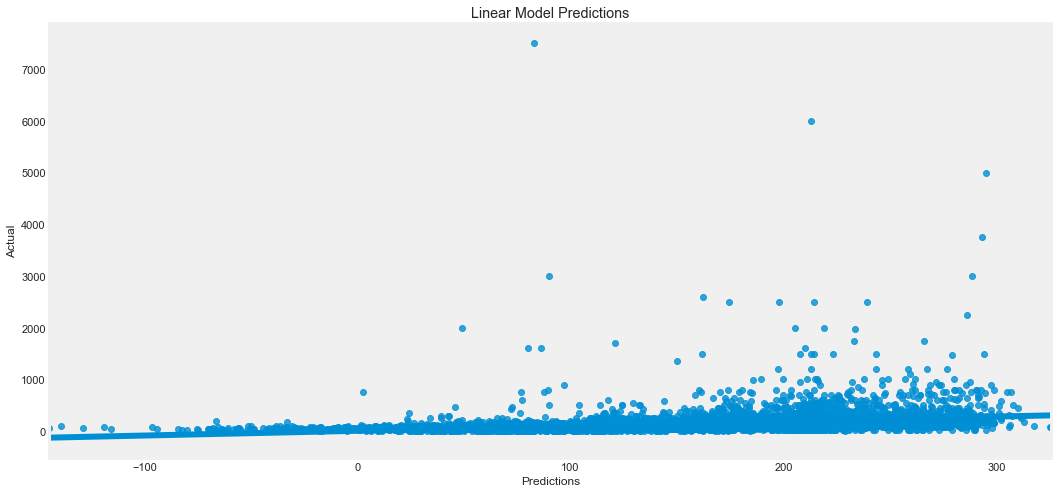

In [57]:
plt.figure(figsize=(16,8))
sns.regplot(predicts,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()